# P2 : Estimation durée de vie résiduelle d'une batterie

**Partie a**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


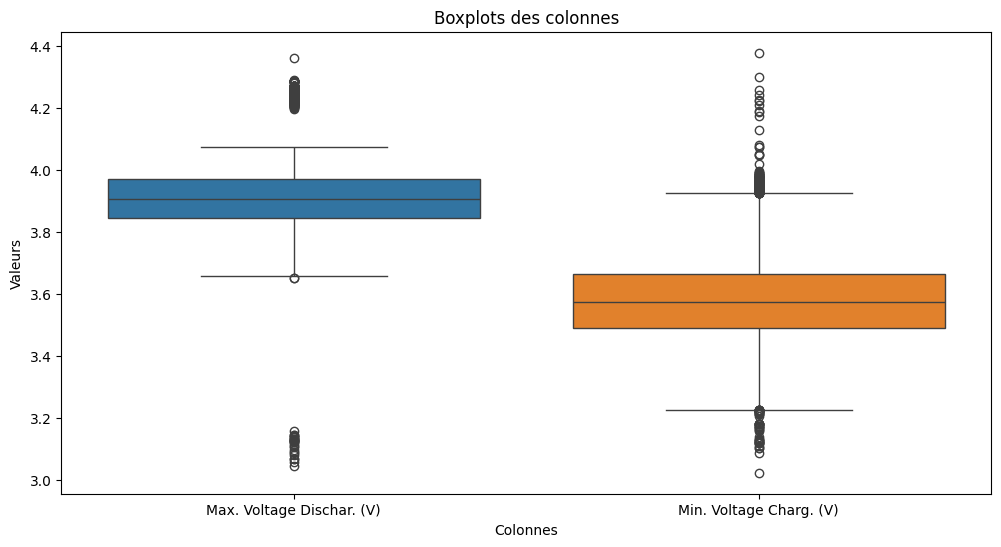

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LECTURE DU FICHIER

from google.colab import drive
drive.mount('/content/drive')
f = pd.read_csv('/content/drive/MyDrive/Battery_RUL.csv')

# NETTOYAGE (BOXPLOT)

# Sélectionner uniquement les colonnes à analyser
#f_filtered = f.iloc[:, 1:-1] #(temps)
#f_filtered = f_filtered.drop(f_filtered.columns[[2, 3]], axis=1) #(temps)

f_filtered = f.iloc[:, 3:5] #(voltages)


plt.figure(figsize=(12, 6))
sns.boxplot(f_filtered)

plt.title('Boxplots des colonnes')
plt.xlabel('Colonnes')
plt.ylabel('Valeurs')
# plt.ylim([0, 6])

# Afficher le graphique
plt.show()

f.describe()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Etude des corrélations entre les mesures et le RUL (Remaining Useful Life)
for column in f.columns[1:-1]:  # Exclut la première et la dernière colonne
    plt.figure(figsize=(12, 6))
    plt.scatter(f['RUL'], f[column])

    # Mettre le nom de la colonne dans le ylabel
    plt.ylabel(column)  # Utilise le nom de la colonne pour le ylabel
    plt.xlabel('RUL (Remaining Useful Life)')

    # Afficher le graphique
    plt.title(f'Correlation entre {column} et RUL')
    plt.show()

NameError: name 'f' is not defined

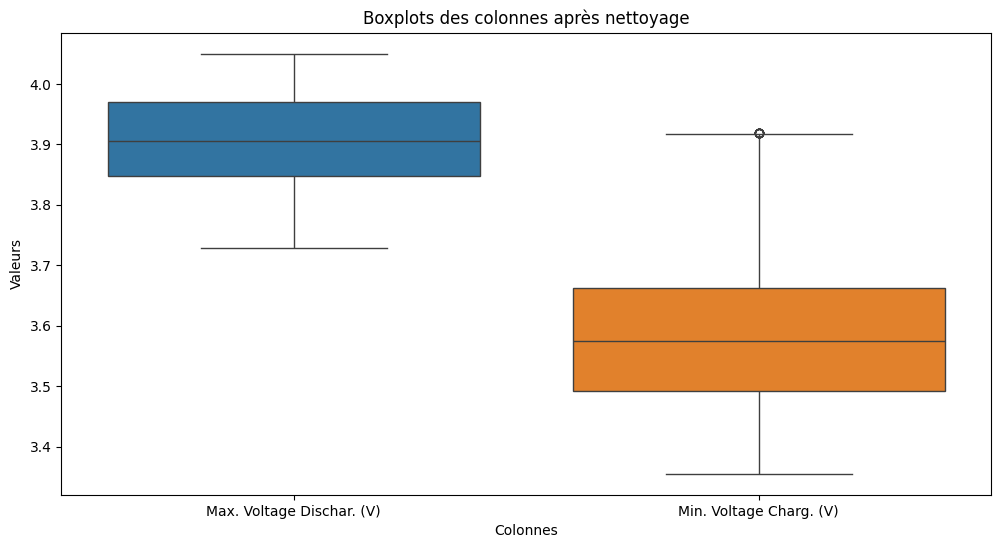

In [ ]:
for column in f.columns[1:-1]:
    # Calcul des quartiles
    Q1 = f[column].quantile(0.25)
    Q3 = f[column].quantile(0.75)
    IQR = Q3 - Q1

    # Définir les bornes pour les valeurs extrêmes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if lower_bound < 0:
      lower_bound = 0
    f = f[(f[column] >= lower_bound) & (f[column] <= upper_bound)]

f.describe()

# Sélectionner uniquement les colonnes à analyser
#f_filtered = f.iloc[:, 1:-1] #(temps)
#f_filtered = f_filtered.drop(f_filtered.columns[[2, 3]], axis=1) #(temps)

f_filtered = f.iloc[:, 3:5] #(voltages)

plt.figure(figsize=(12, 6))
sns.boxplot(f_filtered)

plt.title('Boxplots des colonnes après nettoyage')
plt.xlabel('Colonnes')
plt.ylabel('Valeurs')
# plt.ylim([0, 6])

# Afficher le graphique
plt.show()


**Partie b**

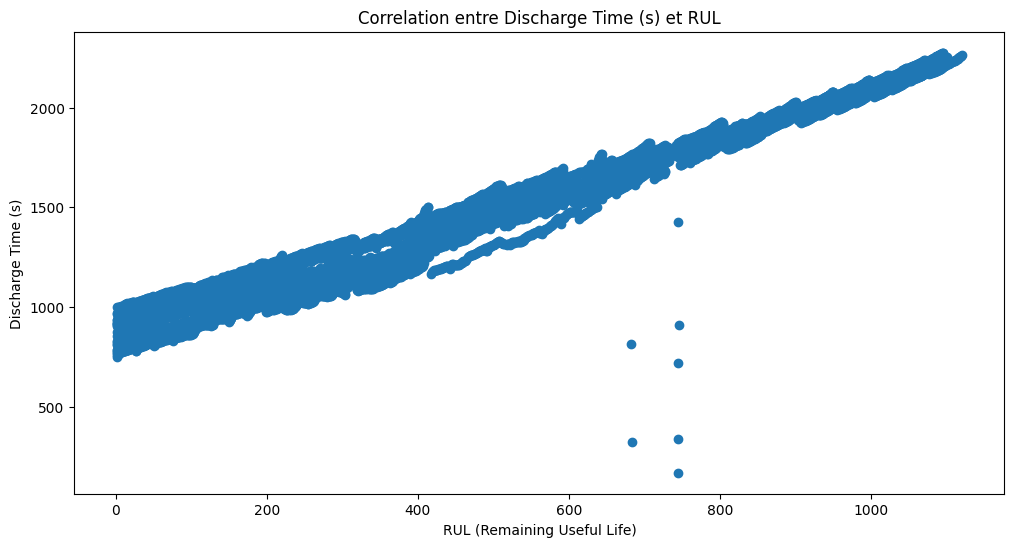

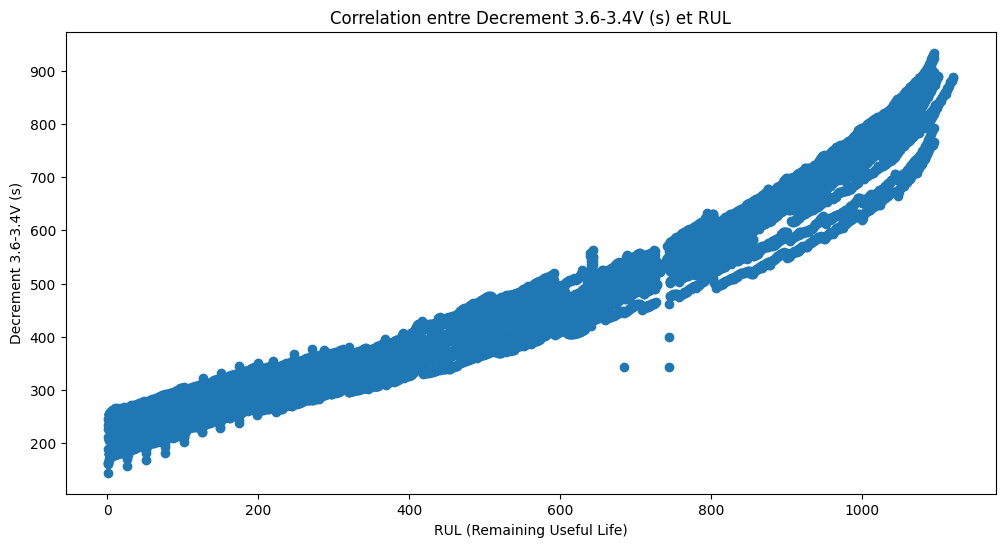

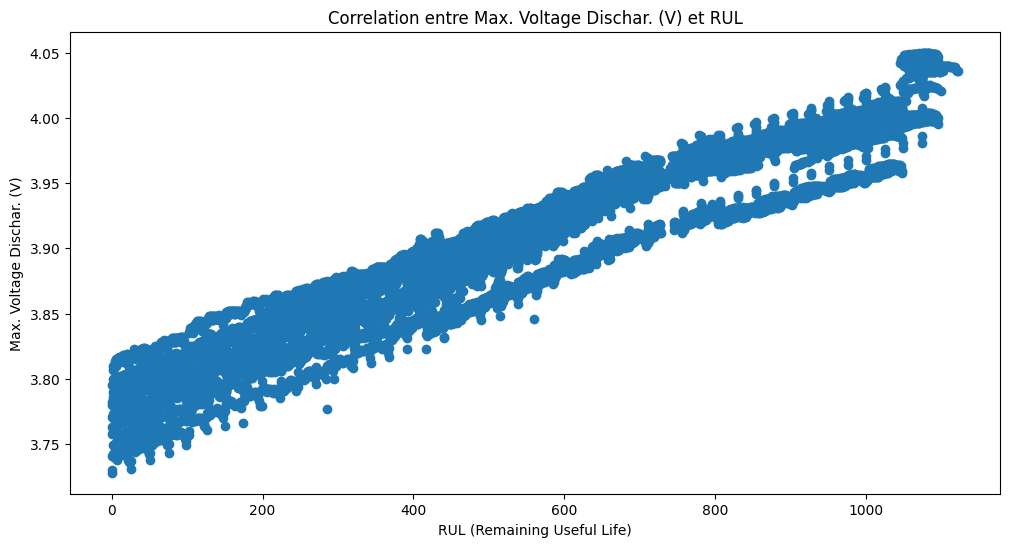

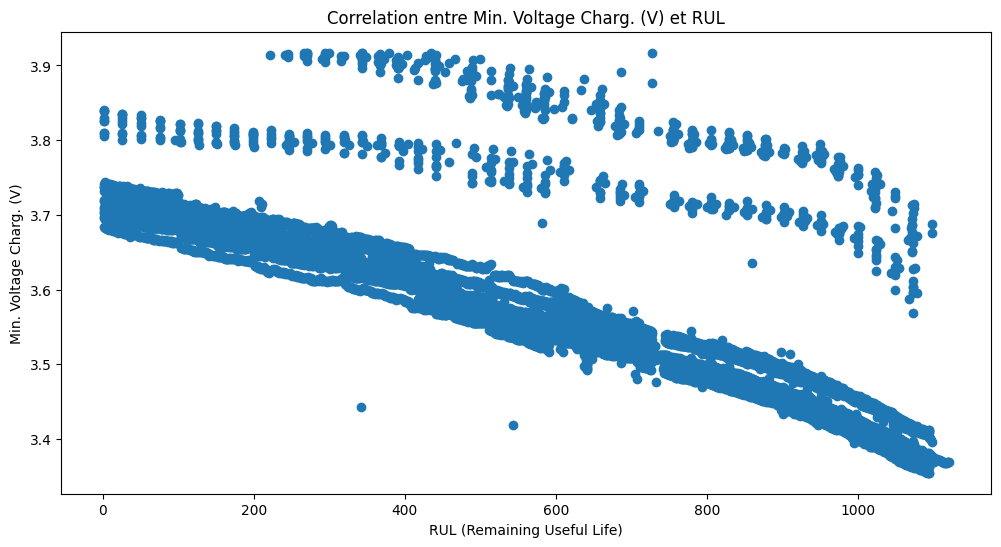

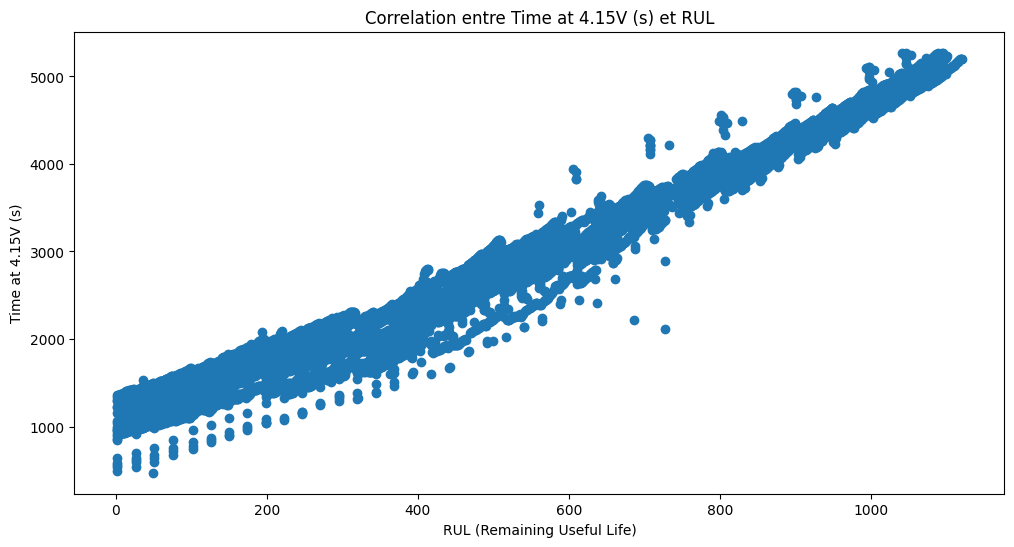

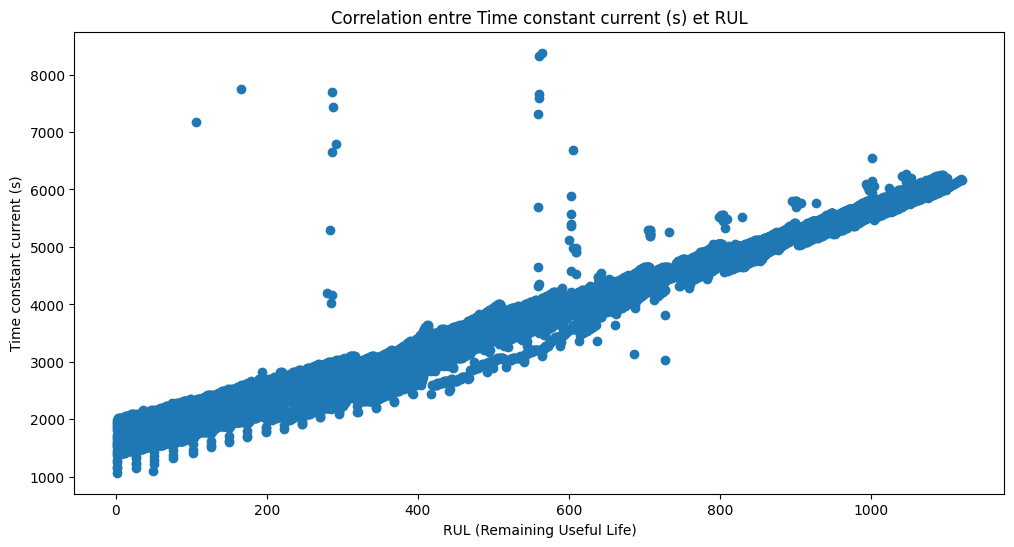

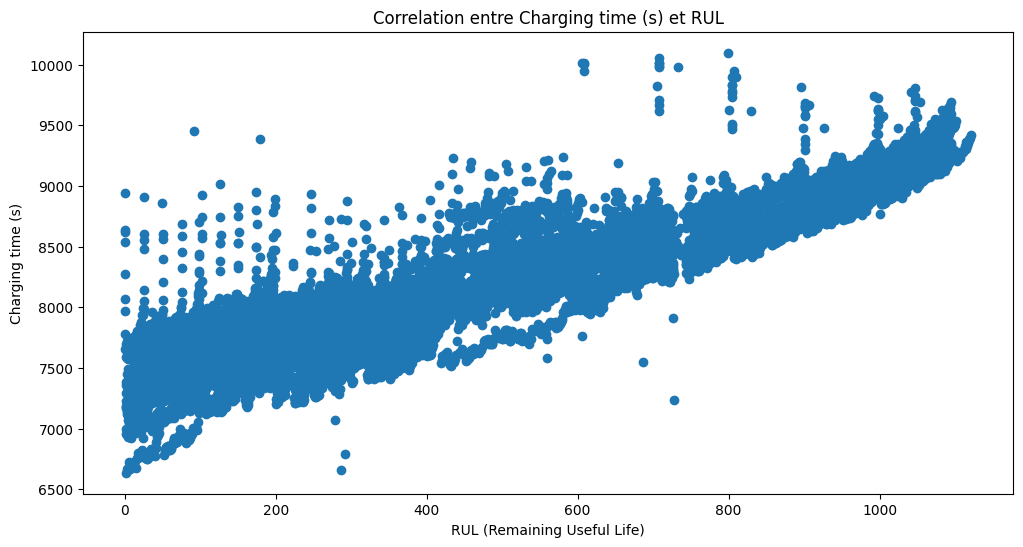

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,Charge Discharge ratio
count,14409.000000,14409.000000,14409.000000,14409.000000,14409.000000,14409.000000,14409.000000,14409.000000,14409.000000,14409.000000
mean,555.687765,1542.828403,466.839225,3.905748,3.576691,2976.757265,3809.410645,8290.118832,554.639808,5.695747
std,318.101370,404.351009,171.643836,0.072669,0.108490,1218.922389,1338.176977,583.533291,318.169913,1.340557
min,13.000000,168.000000,144.678571,3.728000,3.355000,471.906000,1071.000000,6637.120000,1.000000,3.995485
25%,274.000000,1175.250000,321.333333,3.848000,3.492000,1849.548857,2590.020000,7835.880000,282.000000,4.584808
50%,557.000000,1554.840000,439.000000,3.906000,3.574000,2924.320000,3788.390000,8303.880000,554.000000,5.373678
75%,828.000000,1896.000000,594.000000,3.970000,3.662000,4047.552000,4976.350000,8746.310000,836.000000,6.597317
max,1132.000000,2276.260000,933.600000,4.050000,3.917000,5271.553000,8379.810000,10098.330000,1121.000000,49.734702


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que vos données sont chargées dans un DataFrame `f`
# Remplacez cela par le chargement effectif de vos données si nécessaire
# f = pd.read_csv("votre_fichier.csv")  # Exemple

# 1. Supprimer les lignes contenant des valeurs manquantes
f = f.dropna()

# 2. Suppression des valeurs aberrantes
for column in f.columns[1:8]:
    # Calcul des quartiles
    Q1 = f[column].quantile(0.25)
    Q3 = f[column].quantile(0.75)
    IQR = Q3 - Q1

    # Définir les bornes pour les valeurs extrêmes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if lower_bound < 0:
        lower_bound = 0
    f = f[(f[column] >= lower_bound) & (f[column] <= upper_bound)]

# Etude des corrélations entre les mesures et le RUL (Remaining Useful Life)
for column in f.columns[1:8]:  # Exclut la première et la dernière colonne
    plt.figure(figsize=(12, 6))
    plt.scatter(f['RUL'], f[column])

    # Mettre le nom de la colonne dans le ylabel
    plt.ylabel(column)  # Utilise le nom de la colonne pour le ylabel
    plt.xlabel('RUL (Remaining Useful Life)')

    # Afficher le graphique
    plt.title(f'Correlation entre {column} et RUL')
    plt.show()

f.describe()

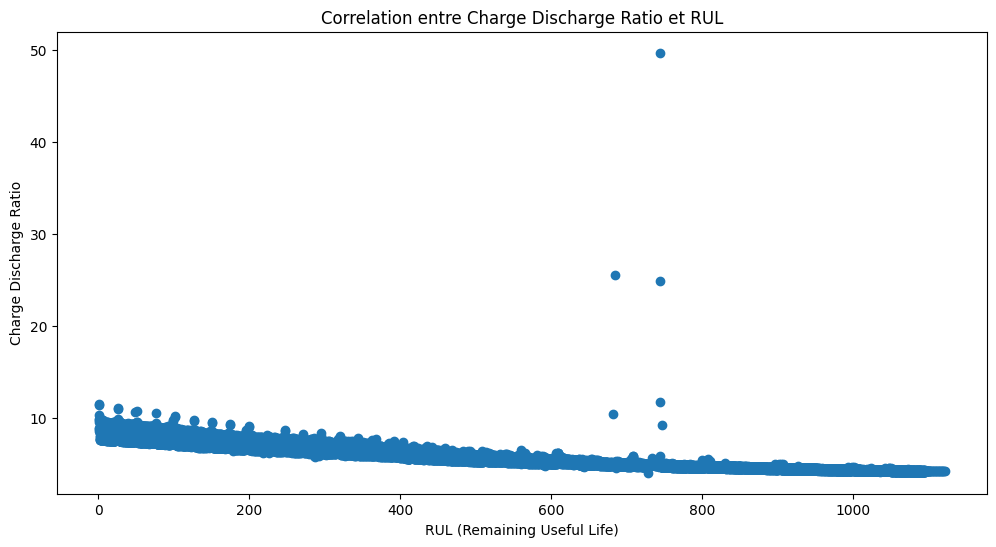

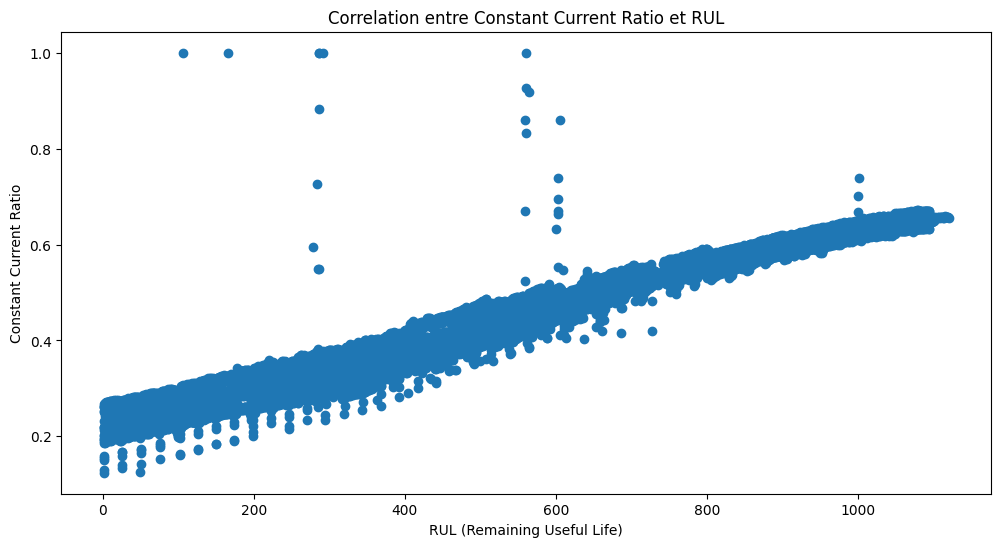

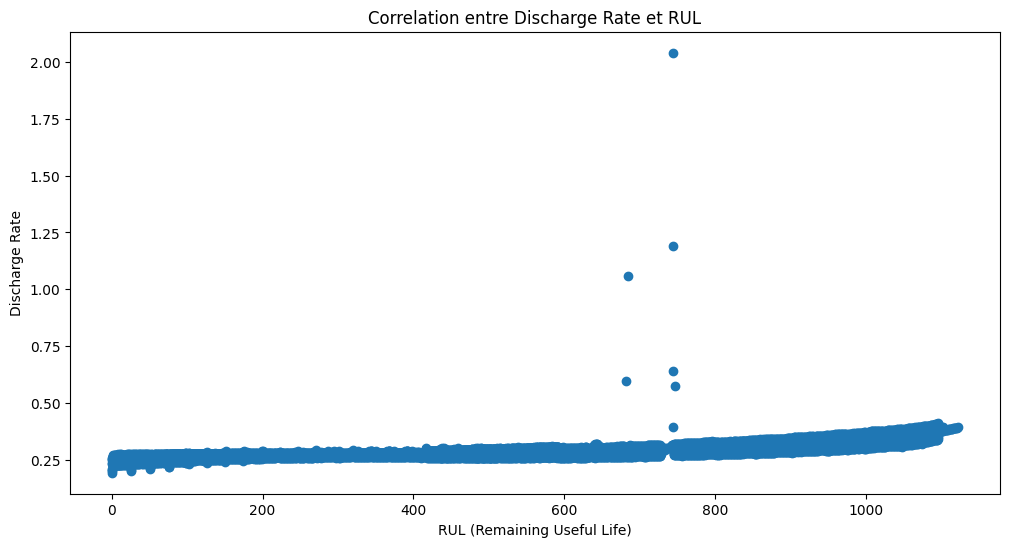

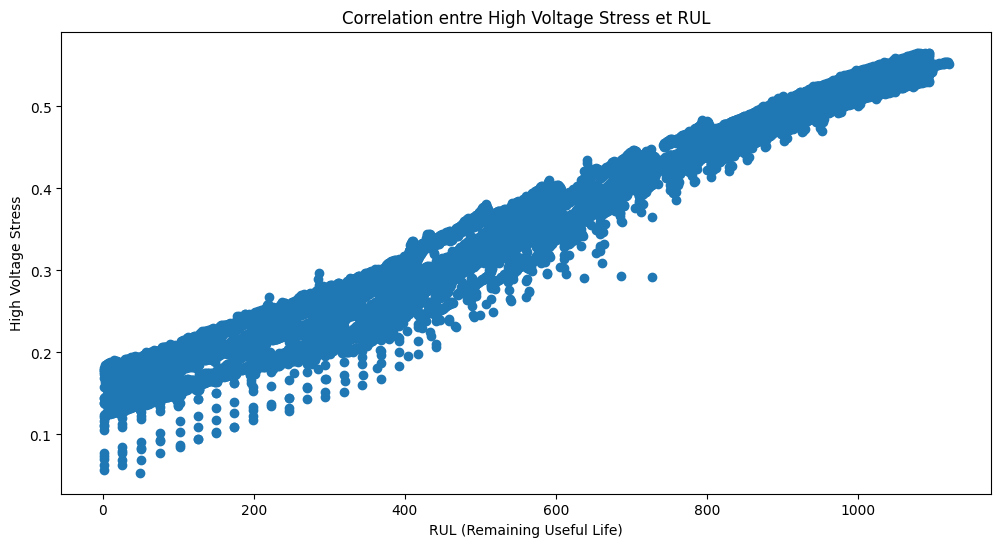

In [ ]:
'''
f["Charge Discharge Ratio"] = f.iloc[:, 7] / f.iloc[:, 1]
f["Constant Current Ratio"] = f.iloc[:, 6] / f.iloc[:, 7]
f["Discharge Rate"] = f.iloc[:, 2] / f.iloc[:, 1]
f["High Voltage Stress"] = f.iloc[:, 5] / f.iloc[:, 7]
'''

for column in f.columns[9:len(f)]:  # Exclut la première et la dernière colonne
    plt.figure(figsize=(12, 6))
    plt.scatter(f['RUL'], f[column])

    # Mettre le nom de la colonne dans le ylabel
    plt.ylabel(column)  # Utilise le nom de la colonne pour le ylabel
    plt.xlabel('RUL (Remaining Useful Life)')

    # Afficher le graphique
    plt.title(f'Correlation entre {column} et RUL')
    plt.show()



In [ ]:
# 2. Suppression des valeurs aberrantes
for column in f.columns[1:8]:
    # Calcul des quartiles
    Q1 = f[column].quantile(0.25)
    Q3 = f[column].quantile(0.75)
    IQR = Q3 - Q1

    # Définir les bornes pour les valeurs extrêmes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if lower_bound < 0:
        lower_bound = 0
    f = f[(f[column] >= lower_bound) & (f[column] <= upper_bound)]

**Suppression des lignes contenant des cases vides et feature engineering**